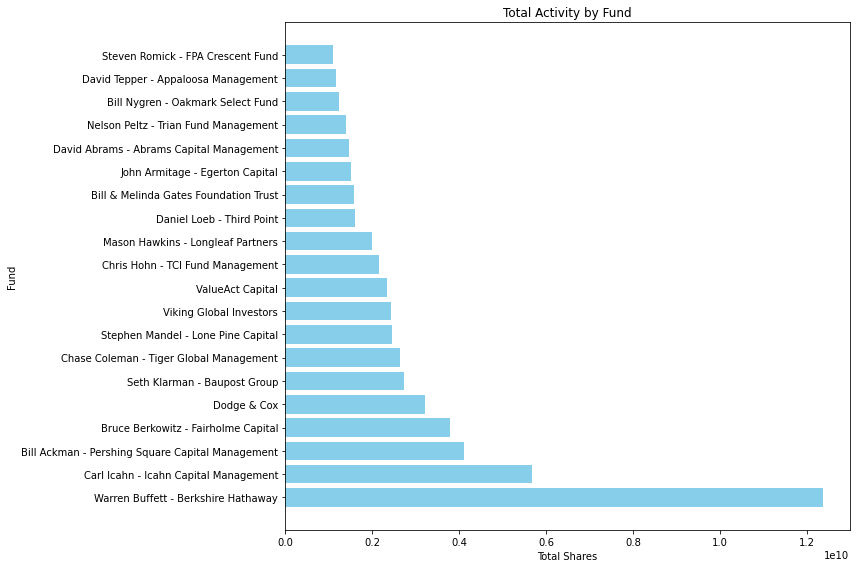

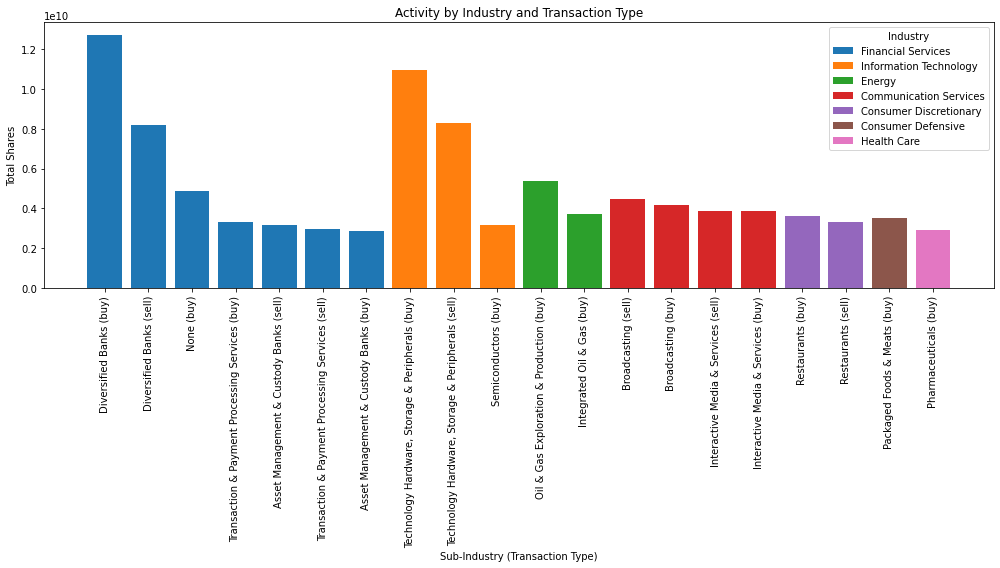

In [2]:
from DB_data import *
from DB_tables import *
import matplotlib.pyplot as plt


def fetch_activity_by_fund():
    file_path = 'DB_connection.txt'
    credentials = read_db_credentials(file_path)
    connection_string = f"postgresql+psycopg2://{credentials['username']}:{credentials['password']}@{credentials['host']}:{credentials['port']}/{credentials['database']}"
    engine = create_engine(connection_string)

    query_activity_by_fund = """
    SELECT s.fund, a.fund_code, SUM(a.share_change) AS total_shares
    FROM activity a
    JOIN superinvestors s ON a.fund_code = s.id
    GROUP BY s.fund, a.fund_code
    ORDER BY total_shares DESC
    LIMIT 20
    """

    df_activity_by_fund = pd.read_sql(query_activity_by_fund, engine)
    return df_activity_by_fund


def visualize_activity_by_fund(df_activity_by_fund):
    plt.figure(figsize=(12, 8))
    plt.barh(df_activity_by_fund['fund'], df_activity_by_fund['total_shares'], color='skyblue')
    plt.title('Total Activity by Fund')
    plt.xlabel('Total Shares')
    plt.ylabel('Fund')
    plt.tight_layout()
    plt.show()

df_activity_by_fund = fetch_activity_by_fund()
visualize_activity_by_fund(df_activity_by_fund)


def fetch_combined_data():
    file_path = 'DB_connection.txt'
    credentials = read_db_credentials(file_path)
    connection_string = f"postgresql+psycopg2://{credentials['username']}:{credentials['password']}@{credentials['host']}:{credentials['port']}/{credentials['database']}"
    engine = create_engine(connection_string)

    query_combined = """
    SELECT c.industry, c.sub_industry, a.transaction_type, SUM(a.share_change) AS total_shares
    FROM activity a
    JOIN companies c ON a.symbol = c.symbol
    GROUP BY c.industry, c.sub_industry, a.transaction_type
    ORDER BY total_shares DESC
    LIMIT 20
    """

    df_combined = pd.read_sql(query_combined, engine)
    return df_combined

def visualize_activity_by_industry(df_combined):
    plt.figure(figsize=(14, 8))

    df_combined['label'] = df_combined['sub_industry'].astype(str) + ' (' + df_combined['transaction_type'].astype(str) + ')'
    
    for industry in df_combined['industry'].unique():
        df_industry = df_combined[df_combined['industry'] == industry]
        plt.bar(df_industry['label'], df_industry['total_shares'], label=industry)
    
    plt.title('Activity by Industry and Transaction Type')
    plt.xlabel('Sub-Industry (Transaction Type)')
    plt.ylabel('Total Shares')
    plt.xticks(rotation=90)
    plt.legend(title='Industry')
    plt.tight_layout()
    plt.show()

df_combined = fetch_combined_data()
visualize_activity_by_industry(df_combined)

        
